In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    implementPairDecayLimit,
    implementPairProductionLimit,
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions

import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `H > hSM hSM > gamgam WW` [1807.08567](https://arxiv.org/abs/1807.08567)

Looks good. Saving this to ggH_LHC13_ATLAS_36.json


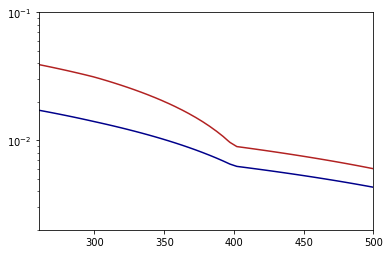

In [2]:
df = pd.DataFrame(
    {
        "mMother": [260, 300, 400, 500],
        "exp": [0.0172, 0.0140, 0.0063, 0.0043],
        "obs": [0.0391, 0.0312, 0.0090, 0.0060],
        "mDaughter1": 125,
    }
)

limitFile = implementPairDecayLimit(
    1683431,
    {
        "production": ["ggH"],  # b-jet veto
        "firstDecay": ["gamgam"],
        "secondDecay": ["WW"],
    },
    "https://doi.org/10.17182/hepdata.83967",
    df,
    massResolution={
        "firstDaughter": {"absolute": 2 * 1.7, "relative": 0},  # p. 9 (* 2 for +-)
        "secondDaughter": {
            "absolute": 40,
            "relative": 0,
        },  # guess, no mjj is reconstructed
        "mother": resolution.WW["qqlnu"],  # guess
    },
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h2 = pred.addParticle(HP.NeutralScalar("h2"))
hh.setDecayWidth("h1", "h2", 1.0)
h1.setDecayWidth("WW", 1)
h2.setDecayWidth("gamgam", 1)
h2.setMass(125)
h1.setMass(125)
hm = np.linspace(260, 500)
r = np.linspace(2e-3, 0.1)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC13", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()

## non-res `pp > hSM hSM > gamgam WW` [1807.08567](https://arxiv.org/abs/1807.08567)

In [3]:
df = pd.DataFrame({"m": [125], "obs": 7.5e-3, "exp": 5.3e-3})
limitFile = implementPairProductionLimit(
    1683431,
    {"firstDecay": ["gamgam"], "secondDecay": ["WW"]},
    "Tab. 6",
    df,
    idSuffix=1,
    massResolution={
        "firstParticle": {"absolute": 2 * 1.7, "relative": 0},  # p. 9 (* 2 for +-)
        "secondParticle": {
            "absolute": 40,
            "relative": 0,
        },  # guess, no mjj is reconstructed
    },
)

lim = HB.Limit(limitFile)

pred = Predictions()
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h1.setDecayWidth("gamgam", 1.0)
h1.setMass(125)
h2 = pred.addParticle(HP.NeutralScalar("h2"))
h2.setDecayWidth("WW", 1.0)
h2.setMass(125)
pred.setBsmPairCxn("LHC13", "h1", "h2", 1.0)
res = lim.apply(pred)
print(res)
assert np.isclose(res[0].obsRatio(), 1.0 / df.obs[0])
assert np.isclose(res[0].expRatio(), 1.0 / df.exp[0])


Looks good. Saving this to nonres_LHC13_ATLAS_36.json
[<Higgs.bounds.AppliedLimit limitId: 1807085671, obsRatio: 133.333, expRatio: 188.679, for: ["h1", "+", "h2"]>]


# ATLAS 8TeV LHC

## H > hSM hSM > WW gamgam [1509.04670](https://arxiv.org/abs/1509.04670)

In [4]:
df = pd.DataFrame(
    data={
        "mMother": [260, 300, 350, 400, 500],
        "exp": [11.2, 9.3, 7.8, 6.9, 5.9],
        "obs": [18.7, 15.1, 13.3, 11.5, 10.9],
        "mDaughter1": 125.4,  # page 16
    }
)
ref = HP.SMHiggs(125.4)
refDec = ref.br("gamgam") * ref.br("WW")
df.exp *= refDec
df.obs *= refDec

limitFile = implementPairDecayLimit(
    "1509.04670",
    {
        "production": ["H"],
        "firstDecay": ["WW"],
        "secondDecay": ["gamgam"],
    },
    "Tab. 6",
    df,
    massResolution={
        "firstDaughter": {
            "absolute": 50,
            "relative": 0,
        },  # guess, no mass reconstructed
        "secondDaughter": {
            "absolute": 1.7,
            "relative": 0,
        },  # final mgamgam selection, p 13
        "mother": {
            "absolute": 25,
            "relative": 0.1,
        },  # guess, larger than the first daughter
    },
    idSuffix=3,  # the other ids are different decay modes
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setDecayWidth("h1", "h2", 1.0)
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h1.setMass(125)
h1.setDecayWidth("WW", 1.0)
h2 = pred.addParticle(HP.NeutralScalar("h2"))
h2.setMass(125)
h2.setDecayWidth("gamgam", 1.0)
hm = np.linspace(260, 500)
r = np.linspace(5 * refDec, 25 * refDec)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC8", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


Looks good. Saving this to H_LHC8_ATLAS_20.json
